In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import KNNImputer

In [2]:
train_data=pd.read_csv("C:/Users/Atharva/Downloads/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
train_data['Survived'].value_counts().keys()

Index([0, 1], dtype='int64', name='Survived')

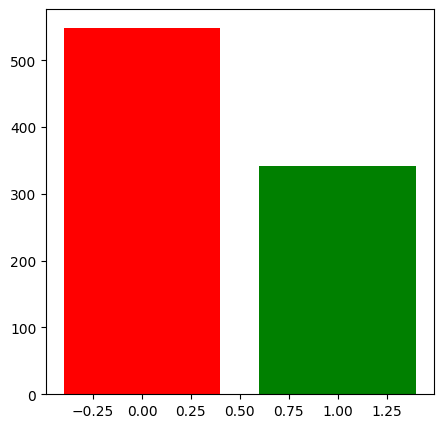

In [7]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data["Survived"].value_counts().keys()),list(train_data["Survived"].value_counts()),color=["r","g"])
plt.show()

In [8]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
train_data['Pclass'].value_counts().keys()

Index([3, 1, 2], dtype='int64', name='Pclass')

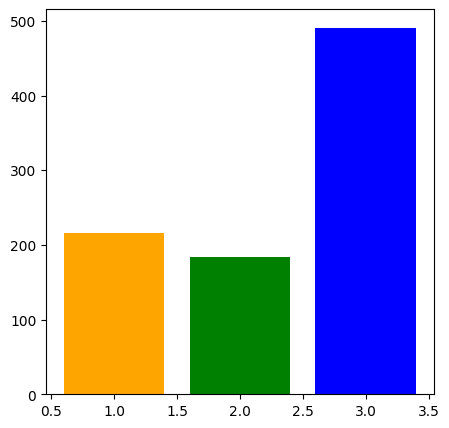

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data["Pclass"].value_counts().keys()),list(train_data["Pclass"].value_counts()),color=["blue","orange","green"])
plt.show()

In [11]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

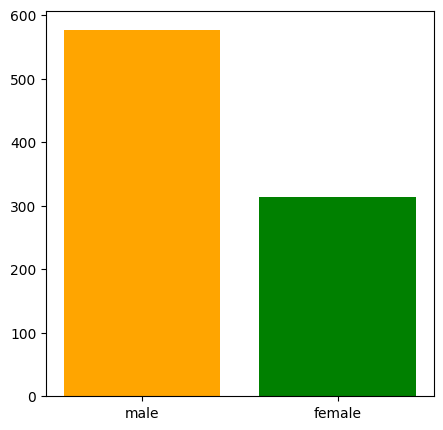

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data["Sex"].value_counts().keys()),list(train_data["Sex"].value_counts()),color=["orange","green"])
plt.show()

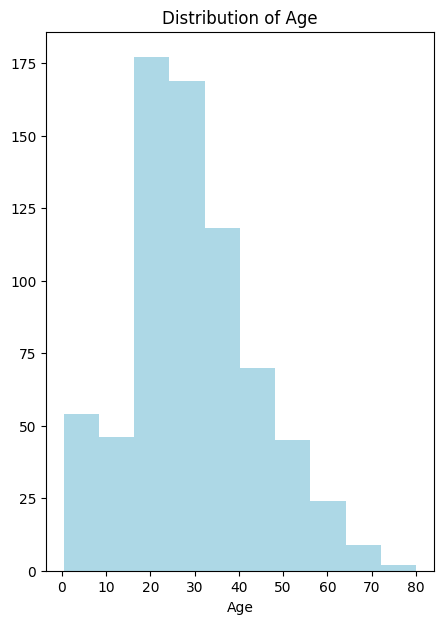

In [13]:
plt.figure(figsize=(5,7))
plt.hist(train_data["Age"],color="lightblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

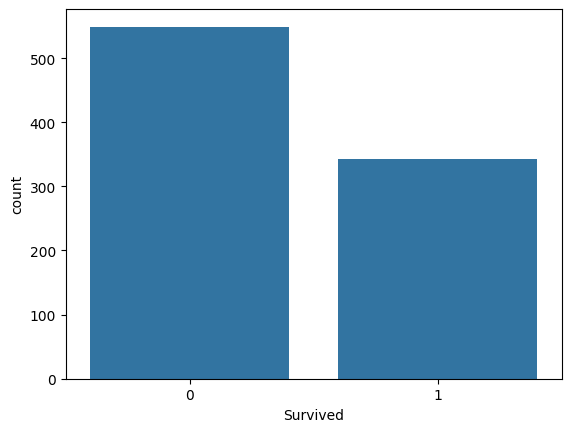

In [14]:
sns.countplot(x="Survived",data=train_data)

<Axes: xlabel='Count', ylabel='Age'>

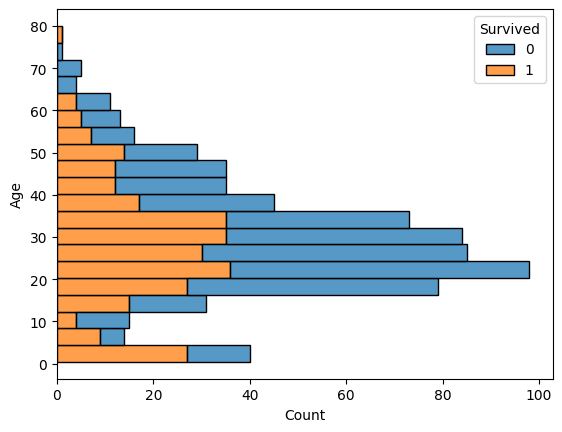

In [15]:
sns.histplot(y=train_data["Age"],hue=train_data["Survived"],multiple="stack")

<Axes: xlabel='Sex', ylabel='Age'>

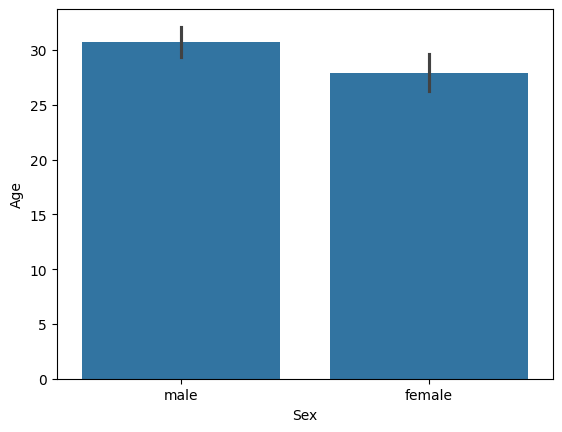

In [16]:
sns.barplot(x='Sex',y='Age',data=train_data)

<Axes: xlabel='Survived', ylabel='Age'>

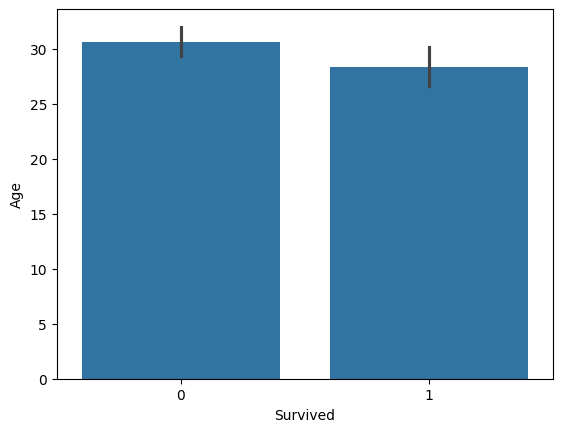

In [17]:
sns.barplot(x='Survived',y='Age',data=train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

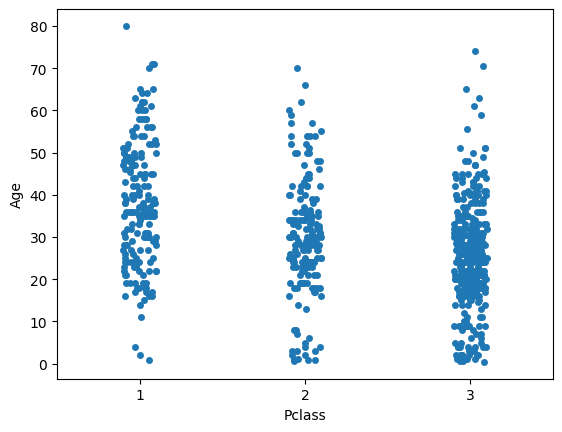

In [18]:
sns.stripplot(x='Pclass', y='Age', data=train_data)

In [19]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

In [21]:
train_data['Cabin'] = train_data['Cabin'].str[0]
train_data = pd.get_dummies(train_data, columns=['Cabin'])

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    bool   
 8   Cabin_B   891 non-null    bool   
 9   Cabin_C   891 non-null    bool   
 10  Cabin_D   891 non-null    bool   
 11  Cabin_E   891 non-null    bool   
 12  Cabin_F   891 non-null    bool   
 13  Cabin_G   891 non-null    bool   
 14  Cabin_T   891 non-null    bool   
dtypes: bool(8), float64(2), int32(1), int64(4)
memory usage: 52.3 KB


In [23]:
imputer = KNNImputer(n_neighbors=5)
train_data[['Age', 'Fare']] = imputer.fit_transform(train_data[['Age', 'Fare']])

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin_A   891 non-null    bool   
 8   Cabin_B   891 non-null    bool   
 9   Cabin_C   891 non-null    bool   
 10  Cabin_D   891 non-null    bool   
 11  Cabin_E   891 non-null    bool   
 12  Cabin_F   891 non-null    bool   
 13  Cabin_G   891 non-null    bool   
 14  Cabin_T   891 non-null    bool   
dtypes: bool(8), float64(2), int32(1), int64(4)
memory usage: 52.3 KB


In [25]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [27]:
model = DecisionTreeClassifier(random_state=42)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
y_train_pred = model.predict(X_train)

In [30]:
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

Accuracy: 0.9865319865319865
